In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [2]:
%matplotlib inline

from session.sessions import selected_009266, selected_008229, selected_009265
from imports import *
from loading import load_session_data
from behavior import get_behav_units
from target import get_spike_counts, build_tgt_matrix, build_silence_matrix
from scipy import stats
from scipy import signal
from functools import reduce
from statsmodels.formula.api import ols, glm
from postprocessing.spiketrain import instantaneous_rate

import pandas as pd

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [74]:
sessions = [s for s in selected_009266.keys()]
#sessions = [s for s in selected_008229.keys()]
sessions.sort()
sessions

['009266_hippoSIT_2023-04-13_08-57-46',
 '009266_hippoSIT_2023-04-14_09-17-34',
 '009266_hippoSIT_2023-04-17_09-06-10',
 '009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-20_15-24-14',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-05-04_09-11-06',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35']

In [81]:
session = sessions[7]

session_data = load_session_data(session, load_aeps=False)
single_units = session_data['single_units']
spike_times  = session_data['spike_times']
tl           = session_data['tl']
behav_units  = get_behav_units(session)
len(behav_units)

8

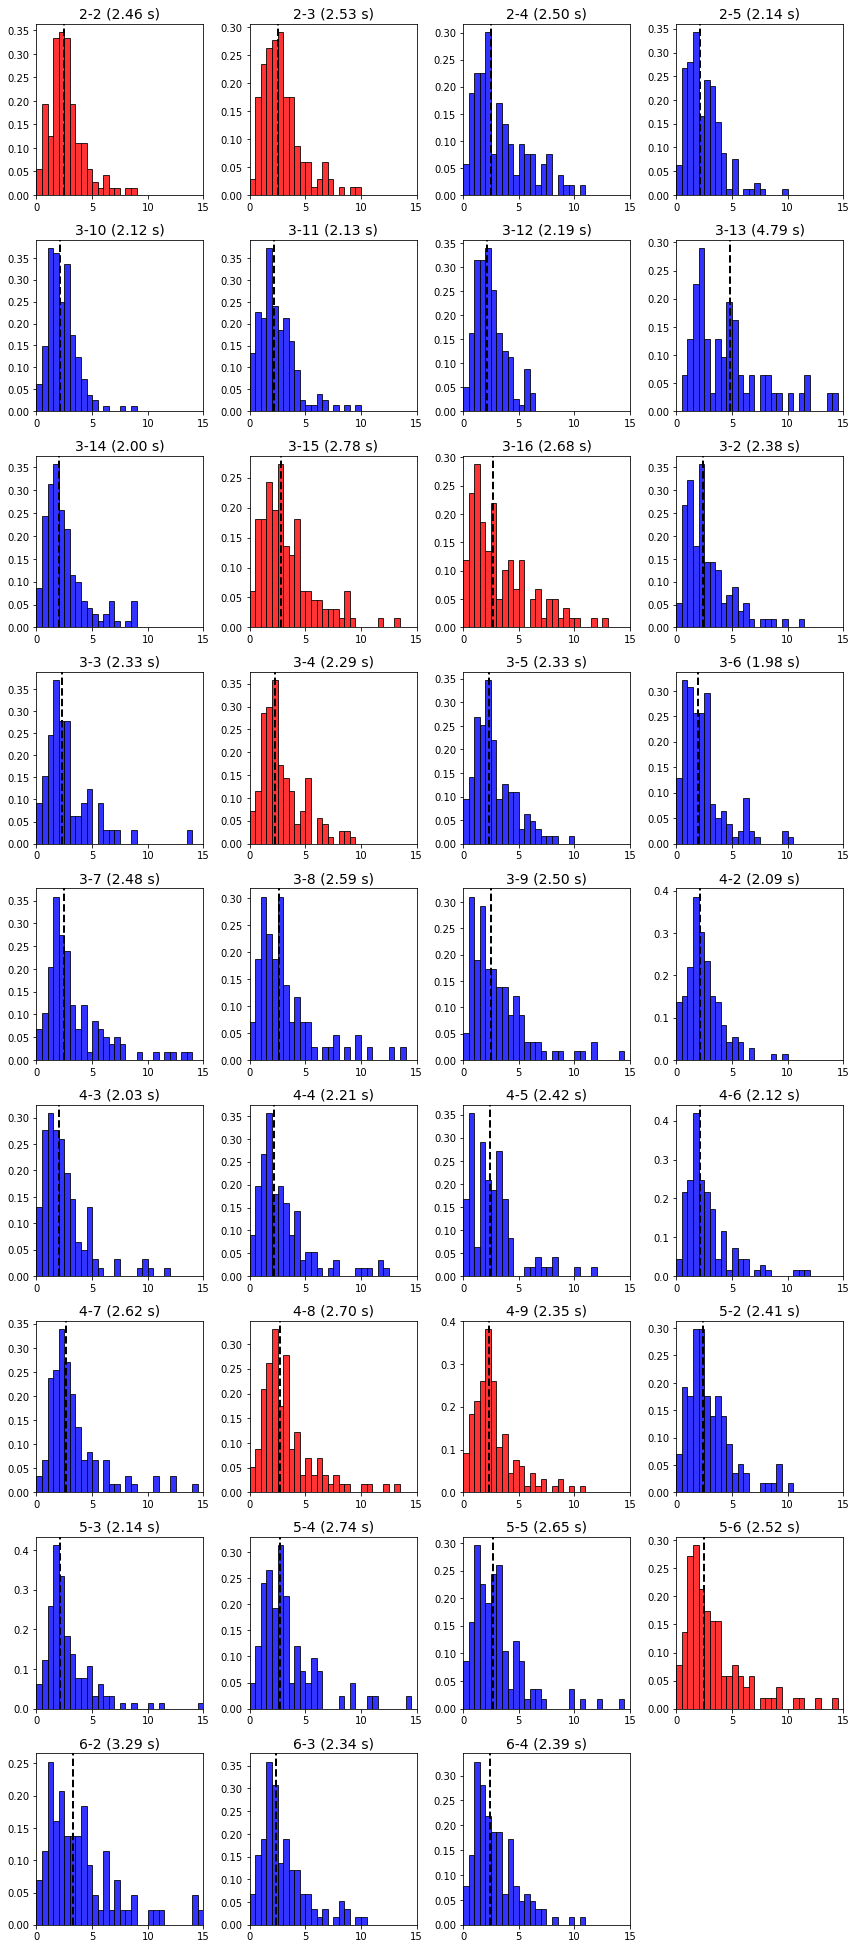

In [98]:
to_plot = list(single_units.keys())
s_rate = 100  # Hz

rows = 3*int(np.ceil(len(to_plot)/4))
cols = 4
fig = plt.figure(figsize=(3*cols, 3*rows))
for i, unit in enumerate(to_plot):
    i_rate = single_units[unit]
    #i_rate = instantaneous_rate(spike_times[unit], tl[:, 0], k_width=70)
    high_fr_idxs = np.where(i_rate > i_rate.mean() + 1*i_rate.std())[0]

    durations = []
    t_count = 0
    for diff_idx in np.diff(high_fr_idxs):
        if diff_idx == 1:
            t_count += 1
        else:
            durations.append(t_count)
            t_count = 0
    durations = np.array(durations)
    
    vals = durations/s_rate
    med  = np.median(vals)
    clr  = 'red' if unit in behav_units else 'blue'
    
    ax = fig.add_subplot(rows, cols, i+1)
    ax.hist(vals, bins=np.linspace(0, 15, 31), edgecolor='black', density=True, color=clr, alpha=0.8)
    ax.set_xlim(0, 15)
    ax.set_title("%s (%.2f s)" % (unit, med), fontsize=14)
    ax.axvline(med, ls='--', color='black', lw=2)
    
fig.tight_layout()